In [0]:
#  The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.
# Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda,
# while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [116]:
#loading our dataset
finscope= pd.read_csv('http://bit.ly/FinancialDataset')
finscope.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [117]:
#characteristics of our data:
finscope.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1922,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [118]:
#check the data types of the columns
finscope.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [131]:
#renaming our columns for typing errrors and spaces
finscope.rename({'Has a Bank account': 'bank_account', 'Type of Location': 'location', 'The relathip with head': 'relationship', 'Respondent Age': 'age', 
                'Level of Educuation': 'education_level', 'Type of Job': 'job', 'Cell Phone Access': 'cellphone'}, axis=1, inplace=True)
finscope.head()

,country,year,uniqueid,bank_account,location,cellphone,household_size,age,gender_of_respondent,relationship,marital_status,education_level,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [102]:
#checking for missing values
finscope.isnull().sum()

country                   23524
year                          0
uniqueid                      0
Has a Bank account           36
Type of Location             15
Cell Phone Access            11
household_size               28
Respondent Age               34
gender_of_respondent         34
The relathip with head        4
marital_status               32
Level of Educuation          29
Type of Job                  30
dtype: int64

In [0]:
#dealing with missing values
#country - forward/backward fill since data is grouped according to countries
finscope['country']= finscope['country'].fillna(method= 'ffill', inplace=True)

In [0]:
#drop rows with missing values for bank since it is our main attribute which we are trying to predict
finscope['bank_account'].dropna()


In [0]:
#drop unnecessary columns

finscope.

In [114]:
#check for anomalies
finscope.year.unique()

array([False])

In [0]:
finscope['year']= (~finscope['year']>2018)

In [130]:
finscope.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
finscope['bank_account']

In [129]:
finscope['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

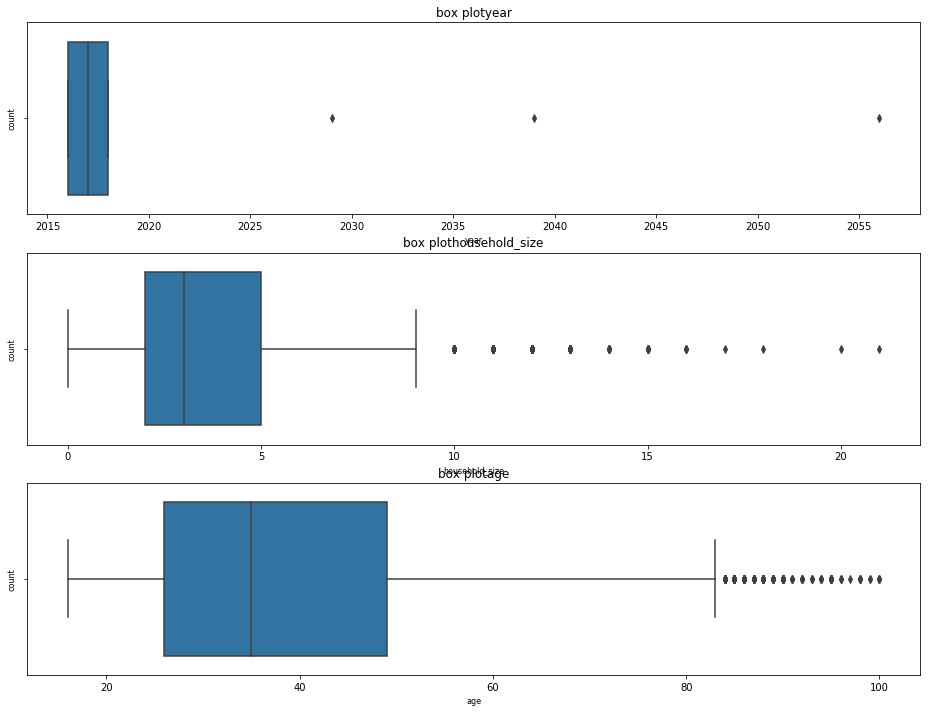

In [134]:
#checking for outliers using box plot
col_names= ['year', 'household_size', 'age']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
  sns.boxplot(finscope[col_val], ax=ax[i])
  ax[i].set_title ('box plot'+col_val, fontsize= 12)
  ax[i].set_xlabel(col_val, fontsize= 8)
  ax[i].set_ylabel('count', fontsize= 8)
plt.show()



#there are outliers in the columns year, household size and age


In [135]:
#check for anomalies
finscope.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [136]:
finscope.age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [0]:
#remove outliers
Q1= finscope.quantile(0.25)
Q3= finscope.quantile(0.75)
IQR= Q1- Q3
finscope= finscope[~(finscope Q1-IQR*1.5| Q3+IQR*1.5)


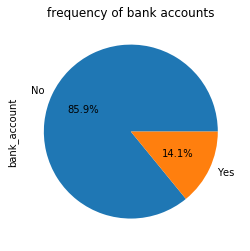

In [143]:
finscope['bank_account'].value_counts().plot.pie(autopct= '%.1f%%', title= 'frequency of bank accounts')
#obnly 14.1% of the population has bank accounts

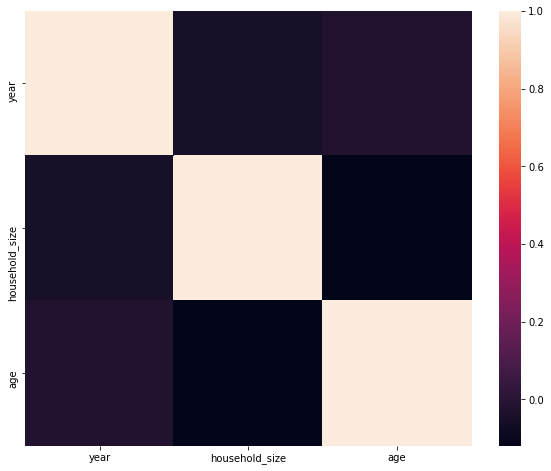

In [144]:
#corelation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = finscope.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)